## 日経２２５を使って株価分析

### 日々のReturnと夜間だけのReturnを比べる。

日経平均株価は取引できる株ではありませんが、株価分析をするにはちょうどよい数値データです。

ここでは、株価分析をするに当たって、はじめの一歩的なことをやっていきたいと思います。

まず非常にかんたんなことをやってみます。

日経平均をどこかのタイミングで買い持ちしてずっと持ち続けることと、

夜間だけ買い持ちするのとどちらが儲かるか、調べてみます。

（ここでは取引コストなどは一切考えないこととします）




In [5]:
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd 

# データは2015/01/05~2018/10/10
df = pd.read_csv("nikkei_stock_average_daily_jp.csv", encoding="shift-jis", index_col="データ日付")
# 最終行にゴミがあるので除去
df = df.iloc[:-1] 


In [9]:
# 毎日のReturn（＝利益）を計算
df["Day Return"] = df["終値"].pct_change()

# 夜間だけのReturnを計算
df["Over Night Return"] = df["始値"]/df["終値"].shift(1) -1 
df.tail()

,終値,始値,高値,安値,Day Return,Over Night Return
データ日付,,,,,,
2018/10/03,24110.96,24219.19,24260.63,24030.59,-0.006578,-0.002119
2018/10/04,23975.62,24242.06,24247.82,23923.26,-0.005613,0.005437
2018/10/05,23783.72,23781.76,23928.62,23730.19,-0.008004,-0.008086
2018/10/09,23469.39,23550.47,23587.05,23442.46,-0.013216,-0.009807
2018/10/10,23506.04,23538.92,23589.38,23373.54,0.001562,0.002963


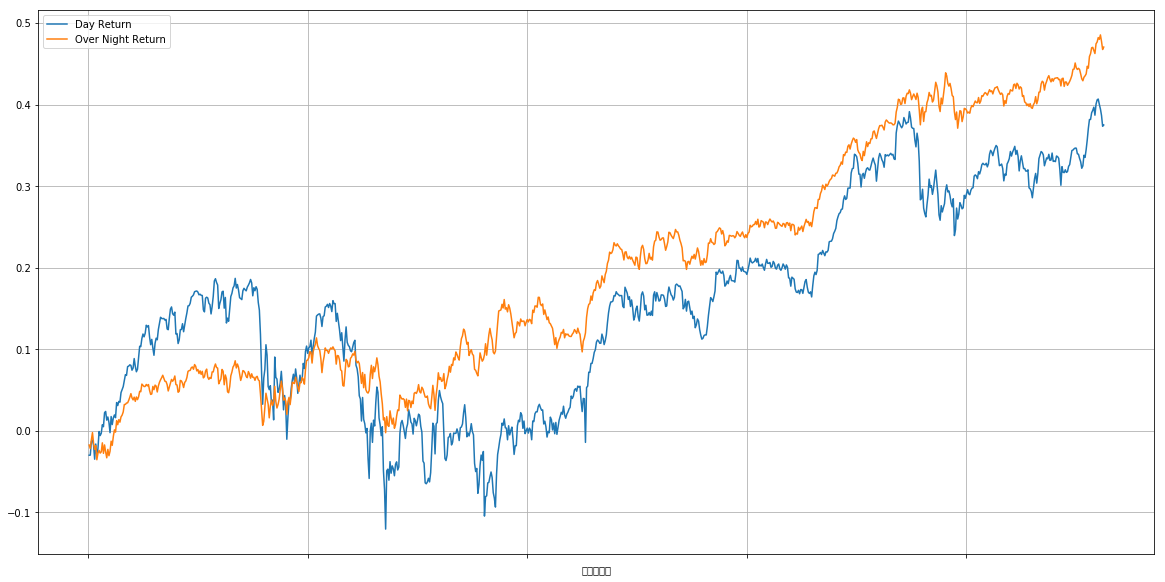

In [8]:
# Day Return と Over Night Return の積算を描画
df[["Day Return", "Over Night Return"]].cumsum().plot(grid=True, figsize=(20,10))

In [10]:
df[["Day Return", "Over Night Return"]].cumsum().iloc[-1]

Day Return           0.374870
Over Night Return    0.470457
Name: 2018/10/10, dtype: float64

In [4]:
df[["Day Return", "Over Night Return"]].dropna().describe()

,Day Return,Over Night Return
count,925.000000,925.000000
mean,0.000405,0.000509
std,0.012693,0.007317
min,-0.079216,-0.019903
25%,-0.004888,-0.003779
50%,0.000647,0.000246
75%,0.006608,0.004908
max,0.077089,0.019945


## より安全な取引をする

上図はDay Return と Over Night Return の積算ですが、あなたならどちらの戦略（＝ストラテジー）に投資したいですか？

それはなぜですか？

株式取引をするうえで、最も重要なのは、**とある期間でどのくらい儲かったか、ということではない**と思っています。

それよりも、重要なのは、**いかに安全に儲かったか**、です。

なぜか？

それは、安全に儲かるストラテジーには資金を投入しやすいからです。

上の例は、日経２２５を取引するには、夜間だけ（つまり前日の終値で買って、翌日の始値で売る）を繰り返したほうが、

ただただずっと保有するより、安全に儲かるということがわかります。

このように、過去データを使って分析し、どういう戦略で株式取引をするのか、を考えることが株価分析です。


